    Intro: 
    
    The capstone project 1 data is in the attached CSV file. I also have snapshots of this data for every day/week/month since May, 2016. 
    
    The data is a CSV output from a specific report in the "InTouch GPS" system. This report measures driver behavior - displaying how many miles they traveld, how long their van was sitting idle, how many rapid acceleration events they racked up, and so on. A list of 214 drivers are displayed, with their names replaced by a randomly generated code.
    
    The goal is to reduce poor driver behaviors and reduce fuel wasted by driving too much, or idling the van too long. Ideally, we could spot the outliers causing most of the problems and address them one-on-one. For example, if the 80 / 20 rule applies, we would expect that about 40 drivers make up almost all the poor driver behavior. Let's find out if that's true. 
    
    Zeros and Blank Values: 
    No major cleaning steps will be necessary regarding non zeros as the InTouch GPS system will automatically replace blank values with zero. 

    There are no missing values, but there are "under utilized" drivers, which will be described below. 
    
    In terms of replacing zeros with values - this will not be necessary as there are circumstances where recording a zero is valid. For example, rapid acceleration events - many drivers will not experience any in a specific time period: 

     

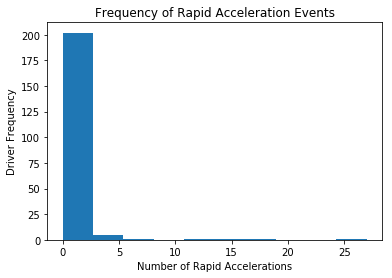

In [1]:
# Import pandas for data processing
import pandas as pd

# Import matplotlib for visualizations
import matplotlib.pyplot as plt

# Load the data into a dataframe
driverBehavior = pd.read_csv("Behavior09012016.csv")

# Checkout the data
driverBehavior.head(10)

#Create plot of Rapid Acceleration 
fig=plt.figure()

ax=fig.add_subplot(1,1,1)
ax.set_title('Frequency of Rapid Acceleration Events')
ax.set_ylabel('Driver Frequency')
ax.set_xlabel('Number of Rapid Accelerations')
ax.hist(driverBehavior['Acceleration'])

plt.show()

In [2]:
driverBehavior.head(10)

,Name,Overall Score,Miles,Duration,Highway %,City %,Idle Time,Idling %,Idling Score,Speeding Score,...,Highway 15+ %,Highway Score,City 1-5 %,City 6-10 %,City 11-14 %,City 15+ %,City Score,Acceleration,Braking,Aggression Score
0,PJPB,76.2,1.9,11:27,0,0,10:54,95.2,4.8,100,...,0,100,0,0,0,0,100,0,0,100.0
1,JAHU,78.7,0.0,3:45,0,0,3:12,85.3,14.7,100,...,0,100,0,0,0,0,100,0,0,100.0
2,QARI,79.1,782.5,111:34:00,0,0,83:09:00,74.5,25.5,100,...,0,100,0,0,0,0,100,0,2,91.1
3,CJBR,79.7,0.1,0:16,0,0,0:13,81.3,18.8,100,...,0,100,0,0,0,0,100,0,0,100.0
4,LPZQ,80.1,710.3,31:11:00,0,0,5:59,19.2,80.8,100,...,0,100,0,0,0,0,100,18,2,39.5
5,SPXU,80.8,0.1,0:30,0,0,0:23,76.7,23.3,100,...,0,100,0,0,0,0,100,0,0,100.0
6,FGKX,81.8,1929.0,111:24:00,0,0,41:55:00,37.6,62.4,100,...,0,100,0,0,0,0,100,27,4,64.7
7,VPVL,82.4,719.6,73:14:00,0,0,38:28:00,52.5,47.5,100,...,0,100,0,0,0,0,100,3,2,81.9
8,EBNU,82.6,303.7,24:16:00,0,0,12:28,51.4,48.6,100,...,0,100,0,0,0,0,100,1,1,81.9
9,ZLMC,83.9,1107.6,90:38:00,0,0,55:32:00,61.3,38.7,100,...,0,100,0,0,0,0,100,0,1,96.8


    For most metrics, outliers will not be pulled as outliers are what we are looking for. 

    There is an exception: a few vans had very little use and were most likely not being used during that particular time period. These vans are not an accurate representation of driver behavior since they are sitting unused - and will be removed during the actual reporting and summary. Any van with only a few hours of month will not be used, as these vans were most likely used as spares or were being repaired, etc. 

    Some data transformation might be required, though. For example, the columns 'Duration' and 'Idle Time' are in the format HOURS:MINUTES - and we might want to split this or round it for easier processing and reporting. 
